<a href="https://colab.research.google.com/github/KeenCodeCV/Hyperparameters-and-ML-Regression/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
from sklearn.pipeline import Pipeline
import importlib.util
from sklearn.metrics import r2_score, root_mean_squared_error
package_name = "skopt"
if importlib.util.find_spec(package_name) is None:
  get_ipython().run_line_magic('pip', 'install scikit-optimize')
else:
  print(f"{package_name} is already installed")

skopt is already installed


In [ ]:
# New data Set
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")
df_taxi = pd.read_csv(path + '/taxi_trip_pricing.csv')
df_taxi.describe(include='all')


Using Colab cache for faster access to the 'taxi-price-prediction' dataset.


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


In [ ]:
# handing the Null value
print('Before handling nulls:\n', df_taxi.isnull().sum(), end='\n')
df_taxi_clean = df_taxi. copy()
for col in df_taxi_clean.columns:
  if df_taxi_clean[col].dtype == 'object' :
    # categorical
    mode_value = df_taxi_clean[col] .mode() . iloc[0]
    df_taxi_clean[col] = df_taxi_clean[col].fillna(mode_value)
  else:
    # numerical
    mean_value = df_taxi_clean[col].mean()
    df_taxi_clean[col] = df_taxi_clean[col].fillna(mean_value)
# Check if any missing values remain
print("After handling nulls: \n", df_taxi_clean. isnull ( ) . sum() )
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
# Columns
numerical_cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes' ]
categorical_cols = ['Time_of_Day' , 'Day_of_Week', 'Traffic_Conditions' , 'Weather' ]
X = df_taxi_clean[numerical_cols + categorical_cols]
y = df_taxi_clean[ ['Trip_Price' ]] .values.ravel()
# Preprocessor: scale numerical, encode categorical
preprocessor = ColumnTransformer(
transformers=[
('num', MinMaxScaler(), numerical_cols),
('cat', OrdinalEncoder(), categorical_cols) # works like LabelEncoder
]
)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Before handling nulls:
 Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64
After handling nulls: 
 Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Import Pipeline
# Build pipeline
KNN = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', KNeighborsRegressor(n_neighbors=3))
]) # Removed the extra parenthesis
# Fit model correctly
KNN.fit(X_train, y_train)
# Predict
y_pred = KNN.predict(X_test)
# Evaluation metrics
KNN_r2 = r2_score(y_test, y_pred)
KNN_rmse = root_mean_squared_error(y_test, y_pred)
print('R2 =', KNN_r2)
print('RMSE=', KNN_rmse)

R2 = 0.09994275772310635
RMSE= 36.046334092596005


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline # Import Pipeline if not already imported
# Build pipeline with Linear Regression
LR = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
]) # Removed the extra parenthesis
# Fit model
LR.fit(X_train, y_train)
# Predict
y_pred = LR.predict(X_test)
# Evaluation metrics
LR_r2 = r2_score(y_test, y_pred)
LR_rmse = root_mean_squared_error(y_test, y_pred)
print('R2 =', LR_r2)
print('RMSE=', LR_rmse)

R2 = 0.794491162154774
RMSE= 17.224288449908244


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline # Import Pipeline

DT = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', DecisionTreeRegressor())
]) # Removed the extra parenthesis and closed the Pipeline properly

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
# Evaluation metrics
DT_r2 = r2_score(y_test, y_pred)
DT_rmse = root_mean_squared_error(y_test, y_pred)
print('R2 =', DT_r2)
print('RMSE=', DT_rmse)

R2 = 0.8597910828908588
RMSE= 14.227017173797318


In [ ]:
# hyperparamters tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor

# Define the KNN regressor
KNN = KNeighborsRegressor()

# GridSearch Hyperparameters tuning for KNN
param_grid = {
'n_neighbors': [1, 3, 5, 7, 9, 11],
'weights': ['uniform', 'distance'],
'p': [1, 2] # 1=Manhattan, 2=Euclidean
}
grid_search = GridSearchCV(
estimator=KNN,
param_grid=param_grid,
cv=10,
scoring='r2',
)
grid_search.fit(X_train_processed, y_train) # Use processed data
# Predict with the best model
y_pred = grid_search.predict(X_test_processed) # Use processed data
GridR2 = r2_score(y_test, y_pred)
GridRmse = root_mean_squared_error(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print('R2 =', GridR2)
print('rmse =', GridRmse)

random_search = RandomizedSearchCV(
estimator=KNN,
param_distributions=param_grid,
n_iter=10,
cv=10,
scoring='r2',
random_state=42 # Added random state for reproducibility
)
random_search.fit(X_train_processed, y_train) # Use processed data
# Predict with the best model
y_pred = random_search.predict(X_test_processed) # Use processed data
# Evaluate
RandomR2 = r2_score(y_test, y_pred)
RandomRmse = root_mean_squared_error(y_test, y_pred)
print("Best hyperparameters:", random_search.best_params_)
print('R2 =', RandomR2)
print('rmse =', RandomRmse)

# Bayesian search for KNN
opt = BayesSearchCV(
estimator=KNN,
search_spaces={
'n_neighbors': Integer(1, 20),
'weights' : Categorical (['uniform' , 'distance' ]),
'p': Integer(1, 2)
# 1=Manhattan, 2=Euclidean
},
n_iter=10,
cv=10,
scoring='r2',
n_jobs =- 1,
random_state=42
)

# Fit the search
opt.fit(X_train_processed, y_train) # Use processed data
# Predict with the best model
y_pred = opt.predict(X_test_processed) # Use processed data
BayesSearchR2 = r2_score(y_test, y_pred)
BayesSearchRmse = root_mean_squared_error(y_test, y_pred)
# Best hyperparameters
print("Best hyperparameters:", opt.best_params_)
print('R2 =', BayesSearchR2)
print('rmse =', BayesSearchRmse)

Best hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
R2 = 0.1619415006353826
rmse = 34.782693167342906
Best hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}
R2 = 0.1619415006353826
rmse = 34.782693167342906
Best hyperparameters: OrderedDict({'n_neighbors': 16, 'p': 1, 'weights': 'distance'})
R2 = 0.16787106439791133
rmse = 34.65942473806573


In [ ]:
import pandas as pd

result_df = pd.DataFrame(
    columns=['Tuning', 'R2', 'RMSE'],
    data=[
        ['Linear Regression', test_r2, test_rmse],
        ['RandomForestRegressor (Initial)', test_r2_rf, test_rmse_rf],
        ['RandomForestRegressor (Tuned)', test_r2_tuned_rf, test_rmse_tuned_rf],
        ['GradientBoostingRegressor (Initial)', test_r2_gbr, test_rmse_gbr],
    ]
)

result_df = result_df.sort_values(by='R2', ascending=False).reset_index(drop=True)
display(result_df)

,Tuning,R2,RMSE
0,RandomForestRegressor (Initial),0.929620,10.079777
1,RandomForestRegressor (Tuned),0.929425,10.093704
2,GradientBoostingRegressor (Initial),0.919058,10.809717
3,Linear Regression,0.794491,17.224288


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Tuning').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='R2', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tuning')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tuning', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tuning')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tuning', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tuning')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tuning', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('RMSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tuning')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tuning', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Tuning'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Tuning', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Tuning'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='R2', y='Tuning', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Tuning'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='RMSE', y='Tuning', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
df_clustering = pd.read_csv(path + '/Mall_Customers.csv')
df_clustering


Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


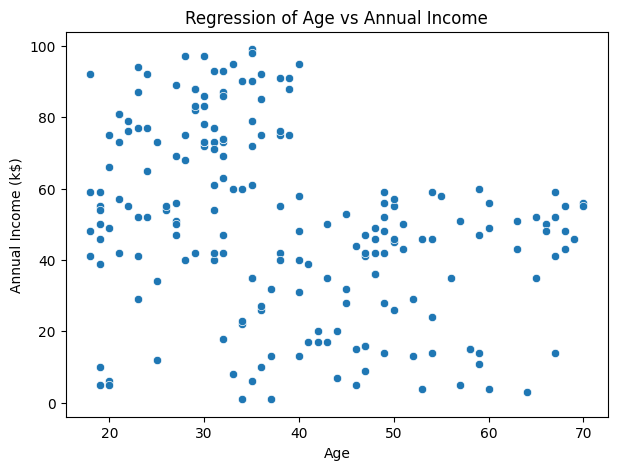

In [ ]:
plt. figure(figsize=(7, 5)) # smaller, since only 1 plot
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_clustering)
plt.xlabel ('Age')
plt.ylabel('Annual Income (k$)')
plt. title('Regression of Age vs Annual Income')
plt. show()


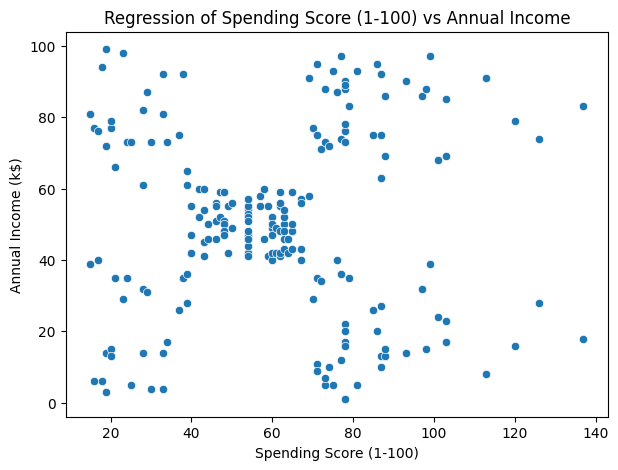

In [ ]:
plt. figure(figsize=(7, 5)) # smaller, since only 1 plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_clustering)
plt.xlabel('Spending Score (1-100)')
plt. ylabel ('Annual Income (k$)')
plt. title('Regression of Spending Score (1-100) vs Annual Income')
plt. show()


/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


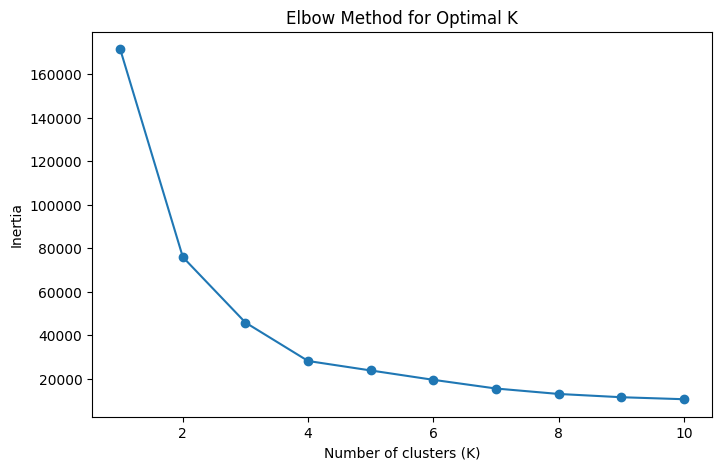

In [ ]:
from sklearn.cluster import KMeans
# Select features
X1 = df_clustering[ ['Age', 'Spending Score (1-100)']].values
# Store inertia values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(
        n_clusters=n,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='elkan'
    )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt. title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt. show()

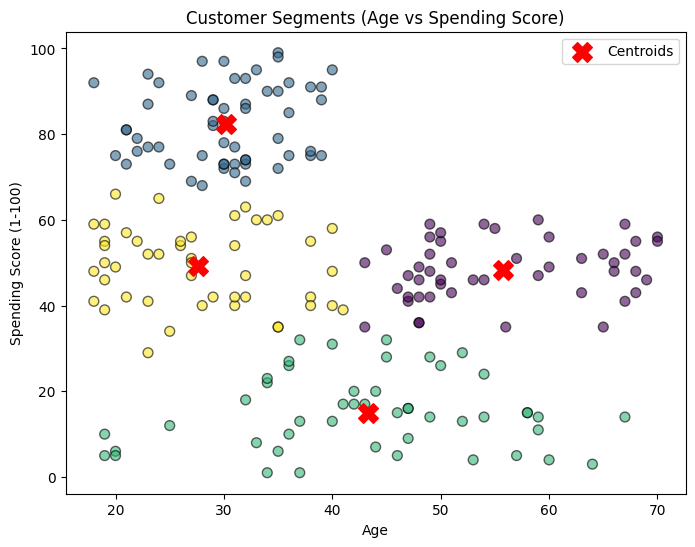

In [ ]:
algorithm = (KMeans(n_clusters=4 , init='k-means++', n_init = 10 ,max_iter=300,
tol=0.0001, random_state= 42 , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm. labels_
centroids1 = algorithm.cluster_centers_
# Add cluster labels to the dataframe
df_clustering[ 'Cluster'] = labels1
# Plot clusters
plt.figure(figsize=(8, 6))
plt. scatter(X1[ :, 0], X1[ :, 1], c=labels1, cmap='viridis', s=50, alpha=0.6, edgecolors='k' )
plt.scatter(centroids1[:, 0], centroids1[:, 1],
c='red', marker='X', s=200, label='Centroids')
plt. title("Customer Segments (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt. legend()
plt. show()


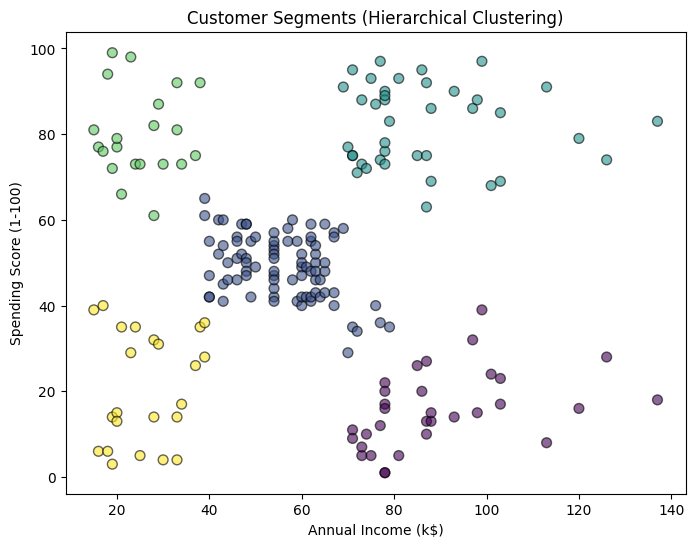

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X2 = df_clustering[ ['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , : ].values
# ใช้ Agglomerative Clustering (Hierarchical)
algorithm = AgglomerativeClustering(
n_clusters=5,
linkage='ward'
)
labels_hc = algorithm. fit_predict(X2)
# เพิ่ม label กลับเข้า dataframe
df_clustering['Cluster_HC'] = labels_hc
# Plot clusters (Hierarchical)
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X1[:, 1], c=labels_hc, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
plt.title("Customer Segments (Hierarchical Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt. show()
